In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [4]:
data=pd.read_csv("Crop_recommendation.csv")

In [5]:
features=data[["N","P","K","ph","temperature","humidity","rainfall"]]
target=data["label"]
labels=data["label"]

In [7]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(features,target,test_size=0.3,random_state=4)

In [9]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [10]:
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
x

0.9075757575757576

In [13]:
#Train Accuracy
DecisionTree.score(Xtrain,Ytrain)

0.9285714285714286

In [14]:
#Test Accuracy
DecisionTree.score(Xtest,Ytest)

0.9075757575757576

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(Ytest,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        26
      banana       0.93      1.00      0.96        25
   blackgram       0.76      0.85      0.80        33
    chickpea       1.00      1.00      1.00        33
     coconut       1.00      1.00      1.00        32
      coffee       0.90      0.93      0.91        28
      cotton       0.93      1.00      0.97        28
      grapes       1.00      1.00      1.00        35
        jute       1.00      0.19      0.32        32
 kidneybeans       1.00      0.68      0.81        25
      lentil       0.94      1.00      0.97        33
       maize       0.89      0.57      0.69        30
       mango       1.00      0.94      0.97        34
   mothbeans       0.59      0.88      0.71        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [15]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.91136364, 0.92045455, 0.87272727, 0.93636364])

In [16]:
score.mean()

0.9154545454545454

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
scores=[0.9285714285714286,0.9075757575757576,0.9154545454545454]
labels=["Train","Test","CV"]

(0.5, 1.0)

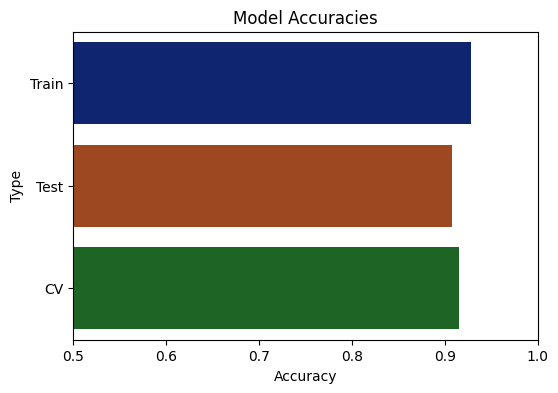

In [24]:
plt.figure(figsize=[6,4],dpi = 100)
plt.title('Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Type')
sns.barplot(x = scores,y = labels,palette="dark")
plt.xlim(0.5,1)

In [27]:
def predict_crop_label(input_features):
    
    
    input_features = np.array(input_features).reshape(1, -1) 
    
    # Predict the crop label using the LogReg model
    predicted_label = DecisionTree.predict(input_features)
    
    return predicted_label[0]  # Return the predicted label

# Example usage:
user_input = [83, 45, 60, 28, 70.3, 7.0, 150.9]  # Example input features (N, P, K, pH, temperature, humidity, rainfall)
predicted_crop_label = predict_crop_label(user_input)
print("Predicted Crop Label:", predicted_crop_label)

user_input = [104,18, 30, 23.603016, 60.3, 6.7, 140.91]  # Example input features (N, P, K, pH, temperature, humidity, rainfall)
predicted_crop_label = predict_crop_label(user_input)
print("Predicted Crop Label:", predicted_crop_label)

Predicted Crop Label: chickpea
Predicted Crop Label: coffee
